In [1]:
import numpy as np
import sys

from keras.models import load_model
from progressbar import ProgressBar

module_path = '/home/ajuric/faks/sem4/diplomski/consensus-net/src/python/utils/'
if module_path not in sys.path:
    print('Adding utils module.')
    sys.path.append(module_path)

import visualization

/home/ajuric/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Adding utils module.


## Load data

In [2]:
X_validate, y_validate = np.load('./dataset-n20-X-validate.npy'), np.load('./dataset-n20-y-validate.npy')

## Helper functions

In [3]:
def generate_predictions(probabilities):
    predictions = np.zeros(probabilities.shape)
    predictions[np.arange(probabilities.shape[0]), np.argmax(probabilities, axis=1)] = 1
    return predictions

## Results from model 15

In [4]:
model = load_model('./model-15.h5')

probabilities = model.predict(X_validate)
predictions = generate_predictions(probabilities)

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


## Test new visualization - only x

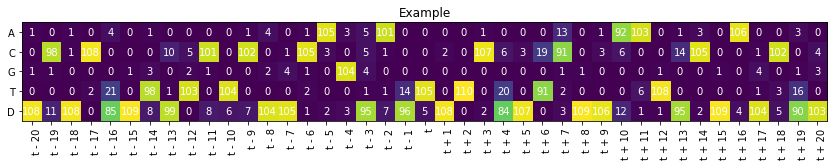

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec

def generate_labels_for_positions(num_positions):
    numbers = (num_positions - 1) // 2
    labels = list()
    for position in range(-numbers, numbers+1):
        if position < 0:
            labels.append('t - {}'.format(-position))
        elif position == 0:
            labels.append('t')
        else:
            labels.append('t + {}'.format(position))
    return labels

num_positions = 41 # neighbourhood_size * 2 + 1
bases = ['A', 'C', 'G', 'T', 'D']
positions = generate_labels_for_positions(num_positions)

example = X_validate[0].T

fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(1, 2, width_ratios=[100, 1]) 

# fig, ax = plt.subplots()
ax0 = plt.subplot(gs[0])
im = ax0.imshow(example)

# We want to show all ticks...
ax0.set_xticks(np.arange(len(positions)))
ax0.set_yticks(np.arange(len(bases)))
# ... and label them with the respective list entries
ax0.set_xticklabels(positions)
ax0.set_yticklabels(bases)

# Rotate the tick labels and set their alignment.
plt.setp(ax0.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(bases)):
    for j in range(len(positions)):
        text = ax0.text(j, i, example[i, j],
                       ha="center", va="center", color="w")

ax0.set_title("Example")
fig.tight_layout()


## Test new visualization - x and prediction

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec

from mpl_toolkits.axes_grid1 import make_axes_locatable

def generate_labels_for_positions(num_positions):
    numbers = (num_positions - 1) // 2
    labels = list()
    for position in range(-numbers, numbers+1):
        if position < 0:
            labels.append('t - {}'.format(-position))
        elif position == 0:
            labels.append('t')
        else:
            labels.append('t + {}'.format(position))
    return labels

def visualize_prediction(xi, yi, probabilities, predictions):
    example = xi.T
    num_positions = example.shape[1]
    positions = generate_labels_for_positions(num_positions)
    
    bases = ['A', 'C', 'G', 'T', 'D']

    fig = plt.figure(figsize=(14, 3))
    gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1]) 

    # Plot example.
    ax0 = plt.subplot(gs[0])
    im = ax0.imshow(example)

    # We want to show all ticks...
    ax0.set_xticks(np.arange(len(positions)))
    ax0.set_yticks(np.arange(len(bases)))
    # ... and label them with the respective list entries
    ax0.set_xticklabels(positions)
    ax0.set_yticklabels(bases)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax0.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(bases)):
        for j in range(len(positions)):
            text = ax0.text(j, i, example[i, j],
                           ha="center", va="center", color="w")

    divider = make_axes_locatable(ax0)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbarlabel = 'frequency'
    cbar = ax0.figure.colorbar(im, cax=cax)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    true_label = bases[np.argmax(yi)]
    ax0.set_title('Example, true_label = {}'.format(true_label))
    fig.tight_layout()

    # Plot prediction.
    ax1 = plt.subplot(gs[1])
    probabilities = np.array([probabilities]).T
    im = ax1.imshow(probabilities)

    output_bases = ['A', 'C', 'G', 'T', 'D', 'I']
    ax1.set_yticks(np.arange(len(output_bases)))
    ax1.set_xticks(np.arange(0))
    # ... and label them with the respective list entries
    ax1.set_yticklabels(probabilities)
    for i in range(len(output_bases)):
        text = ax1.text(0, i, output_bases[i],
                        ha="center", va="center", color="w")

    cbarlabel = 'Probabilities'
    cbar = ax1.figure.colorbar(im, ax=ax1)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    predicted_label = output_bases[np.argmax(predictions)]
    ax1.set_title('Predictions, label = {}'.format(predicted_label))

[1.3194340e-03 5.7409615e-03 7.0257398e-04 9.9138367e-01 8.2921918e-04
 2.4066694e-05]
[0. 0. 0. 1. 0. 0.]


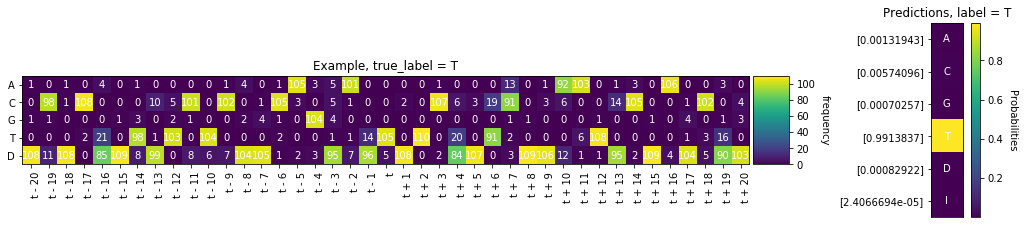

In [11]:
xi, yi = X_validate[0], y_validate[0]
pred_i, prob_i = predictions[0], probabilities[0]

print(prob_i)
print(pred_i)

visualize_prediction(xi, yi, prob_i, pred_i)